In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import scipy.stats as sts 
plt.style.use('ggplot')

In [2]:
priem = pd.read_csv('Priem_utf.csv', sep=';')

In [3]:
priem.head()

,Пол,Сумма.баллов,ЕГЭ...матем.,ЕГЭ...рус.яз.,Аттестат.с.отличием.оценка,ГТО.оценка,Сочинение.оценка,Регион,Тип.насел..пункта,Дата.рождения,День.рождения,Месяц.рождения
0,МУЖСКОЙ,388,90.0,98.0,5,0,1,Красноярский край,ГОРОД,24.09.1998,24,9
1,ЖЕНСКИЙ,351,84.0,87.0,0,0,2,Чувашская Респ,ЦЕНТР СУБЪЕКТА ФЕДЕРАЦИИ,14.02.1997,14,2
2,ЖЕНСКИЙ,355,94.0,91.0,5,0,2,Москва г,ГОРОД ФЕДЕРАЛЬНОГО ЗНАЧЕНИЯ,25.03.2000,25,3
3,ЖЕНСКИЙ,338,76.0,88.0,5,0,2,Москва г,ГОРОД ФЕДЕРАЛЬНОГО ЗНАЧЕНИЯ,19.11.1999,19,11
4,МУЖСКОЙ,349,82.0,93.0,5,0,2,Москва г,ГОРОД ФЕДЕРАЛЬНОГО ЗНАЧЕНИЯ,12.12.1999,12,12


In [4]:
priem.columns

Index(['Пол', 'Сумма.баллов', 'ЕГЭ...матем.', 'ЕГЭ...рус.яз.',
       'Аттестат.с.отличием.оценка', 'ГТО.оценка', 'Сочинение.оценка',
       'Регион', 'Тип.насел..пункта', 'Дата.рождения', 'День.рождения',
       'Месяц.рождения'],
      dtype='object')

In [5]:
priem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1390 entries, 0 to 1389
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Пол                         1390 non-null   object 
 1   Сумма.баллов                1390 non-null   int64  
 2   ЕГЭ...матем.                1385 non-null   float64
 3   ЕГЭ...рус.яз.               1387 non-null   float64
 4   Аттестат.с.отличием.оценка  1390 non-null   int64  
 5   ГТО.оценка                  1390 non-null   int64  
 6   Сочинение.оценка            1390 non-null   int64  
 7   Регион                      1390 non-null   object 
 8   Тип.насел..пункта           1390 non-null   object 
 9   Дата.рождения               1390 non-null   object 
 10  День.рождения               1390 non-null   int64  
 11  Месяц.рождения              1390 non-null   int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 130.4+ KB


<h3>Тестируем гипотезу о том, что дни рождения распределины равномерно

In [6]:
days_expected = np.array([12*priem['День.рождения'].count()/365]*28)
days_expected = np.insert(days_expected, 28, [11*priem['День.рождения'].count()/365, 11*priem['День.рождения'].count()/365,
                                              7*priem['День.рождения'].count()/365])
display(days_expected)
days_expected.shape

array([45.69863014, 45.69863014, 45.69863014, 45.69863014, 45.69863014,
       45.69863014, 45.69863014, 45.69863014, 45.69863014, 45.69863014,
       45.69863014, 45.69863014, 45.69863014, 45.69863014, 45.69863014,
       45.69863014, 45.69863014, 45.69863014, 45.69863014, 45.69863014,
       45.69863014, 45.69863014, 45.69863014, 45.69863014, 45.69863014,
       45.69863014, 45.69863014, 45.69863014, 41.89041096, 41.89041096,
       26.65753425])

(31,)

In [7]:
days_actual = np.array([priem[priem['День.рождения'] == i]['День.рождения'].count() for i in range(1, 32)])
display(days_actual)
days_actual.shape

array([43, 43, 36, 56, 55, 50, 64, 41, 45, 43, 44, 37, 42, 57, 42, 44, 51,
       46, 47, 38, 48, 50, 41, 44, 41, 37, 48, 47, 47, 43, 20])

(31,)

In [8]:
sts.chisquare(days_actual, days_expected)

Power_divergenceResult(statistic=27.780427605967176, pvalue=0.5820711822940035)

Уровень принятия $alpha = 0.01 $, pvalue > alpha 

<h3>Тестируем гипотезу о том, что месяца рождения распределины равномерно

In [31]:
mounth_expected = np.array([0]*12)
mounth_expected[[0, 2, 4, 6, 7, 9, 11]] = 31*priem['Месяц.рождения'].count()/365
mounth_expected[[3, 5, 8, 10]] = 30*priem['Месяц.рождения'].count()/365
mounth_expected[1] = 28*priem['Месяц.рождения'].count()/365
display(mounth_expected)
mounth_expected.shape

array([118, 106, 118, 114, 118, 114, 118, 118, 114, 118, 114, 118])

(12,)

In [32]:
mounth_actual = np.array([priem[priem['Месяц.рождения'] == i]['Месяц.рождения'].count() for i in range(1, 13)])
display(mounth_actual)
mounth_actual.shape

array([121,  97, 107, 106, 132, 124, 116, 127, 132, 117, 103, 108])

(12,)

In [33]:
sts.chisquare(mounth_actual, mounth_expected)

Power_divergenceResult(statistic=10.44523925740158, pvalue=0.49083716799834165)

<h3> H0 : Сумма баллов и Балы гто распределены одинаково

In [128]:
priem[priem['Сумма.баллов'] == 408]

,Пол,Сумма.баллов,ЕГЭ...матем.,ЕГЭ...рус.яз.,Аттестат.с.отличием.оценка,ГТО.оценка,Сочинение.оценка,Регион,Тип.насел..пункта,Дата.рождения,День.рождения,Месяц.рождения
217,ЖЕНСКИЙ,408,100.0,100.0,5,0,3,Московская обл,ГОРОД,22.05.1999,22,5


In [112]:
(priem['Сумма.баллов'].max() - priem['Сумма.баллов'].min())/10

21.2

In [64]:
priem['Сумма.баллов'].min()

196

In [120]:
count_GTO = [0]*22
GTO = list(map(int, (priem[priem['ГТО.оценка'] != 0]['Сумма.баллов'] - 196)/10))
for i in GTO:
    count_GTO[i] += 1

In [124]:
count_NoGTO = [0]*22
NoGTO = list(map(int, (priem[priem['ГТО.оценка'] == 0]['Сумма.баллов'] - 196)/10))
for i in NoGTO:
    count_NoGTO[i] += 1
sum(count_NoGTO) + sum(count_GTO)

1390

In [122]:
GTO = np.array([count_GTO, count_NoGTO])
display(GTO)
sts.chi2_contingency(GTO)

array([[  0,   0,   1,   0,   2,   5,   3,   3,   7,   9,  14,  14,  21,
         17,  19,  18,  21,  13,   4,   6,   2,   0],
       [  2,   1,   3,   2,   4,  12,  13,  30,  65,  55,  97, 100, 123,
        116, 132, 119,  97,  99,  79,  40,  20,   2]])

(17.801273249379435,
 0.6615431706202923,
 21,
 array([[2.57553957e-01, 1.28776978e-01, 5.15107914e-01, 2.57553957e-01,
         7.72661871e-01, 2.18920863e+00, 2.06043165e+00, 4.24964029e+00,
         9.27194245e+00, 8.24172662e+00, 1.42942446e+01, 1.46805755e+01,
         1.85438849e+01, 1.71273381e+01, 1.94453237e+01, 1.76424460e+01,
         1.51956835e+01, 1.44230216e+01, 1.06884892e+01, 5.92374101e+00,
         2.83309353e+00, 2.57553957e-01],
        [1.74244604e+00, 8.71223022e-01, 3.48489209e+00, 1.74244604e+00,
         5.22733813e+00, 1.48107914e+01, 1.39395683e+01, 2.87503597e+01,
         6.27280576e+01, 5.57582734e+01, 9.67057554e+01, 9.93194245e+01,
         1.25456115e+02, 1.15872662e+02, 1.31554676e+02, 1.19357554e+02,
         1.02804317e+02, 9.75769784e+01, 7.23115108e+01, 4.00762590e+01,
         1.91669065e+01, 1.74244604e+00]]))

pvalue > 0.01 Не отвергаем H0

<h3> H0 : Сумма баллов и Отличный Аттестат распределены одинаково

In [126]:
count_GRE = [0]*22
GRE = list(map(int, (priem[priem['Аттестат.с.отличием.оценка'] != 0]['Сумма.баллов'] - 196)/10))
for i in GRE:
    count_GRE[i] += 1
count_NoGRE = [0]*22
NoGRE = list(map(int, (priem[priem['Аттестат.с.отличием.оценка'] == 0]['Сумма.баллов'] - 196)/10))
for i in NoGRE:
    count_NoGRE[i] += 1
sum(count_NoGRE) + sum(count_GRE)

1390

In [127]:
GRE = np.array([count_GRE, count_NoGRE])
display(GRE)
sts.chi2_contingency(GRE)

array([[ 0,  0,  0,  0,  0,  3,  2,  7, 19, 18, 39, 41, 55, 52, 56, 59,
        45, 58, 38, 29, 19,  2],
       [ 2,  1,  4,  2,  6, 14, 14, 26, 53, 46, 72, 73, 89, 81, 95, 78,
        73, 54, 45, 17,  3,  0]])

(76.71263973815267,
 2.839469945737147e-08,
 21,
 array([[ 0.77985612,  0.38992806,  1.55971223,  0.77985612,  2.33956835,
          6.62877698,  6.23884892, 12.8676259 , 28.07482014, 24.95539568,
         43.28201439, 44.45179856, 56.14964029, 51.86043165, 58.87913669,
         53.42014388, 46.01151079, 43.67194245, 32.36402878, 17.93669065,
          8.57841727,  0.77985612],
        [ 1.22014388,  0.61007194,  2.44028777,  1.22014388,  3.66043165,
         10.37122302,  9.76115108, 20.1323741 , 43.92517986, 39.04460432,
         67.71798561, 69.54820144, 87.85035971, 81.13956835, 92.12086331,
         83.57985612, 71.98848921, 68.32805755, 50.63597122, 28.06330935,
         13.42158273,  1.22014388]]))

pvalue < 0.01 Отвергаем H0

<h3> H0 : Сумма баллов и Сочинение распределены одинаково

In [130]:
count_ESSE = [0]*22
ESSE = list(map(int, (priem[priem['Сочинение.оценка'] != 0]['Сумма.баллов'] - 196)/10))
for i in ESSE:
    count_ESSE[i] += 1
count_NoESSE = [0]*22
NoESSE = list(map(int, (priem[priem['Сочинение.оценка'] == 0]['Сумма.баллов'] - 196)/10))
for i in NoESSE:
    count_NoESSE[i] += 1
sum(count_NoESSE) + sum(count_ESSE)

1390

In [132]:
ESSE = np.array([count_ESSE, count_NoESSE])
display(ESSE)
sts.chi2_contingency(ESSE)

array([[  0,   1,   2,   2,   6,  15,  12,  30,  67,  60, 102, 105, 125,
        123, 136, 132, 105, 104,  81,  45,  22,   2],
       [  2,   0,   2,   0,   0,   2,   4,   3,   5,   4,   9,   9,  19,
         10,  15,   5,  13,   8,   2,   1,   0,   0]])

(58.43262834693268,
 2.1987772721009152e-05,
 21,
 array([[1.83741007e+00, 9.18705036e-01, 3.67482014e+00, 1.83741007e+00,
         5.51223022e+00, 1.56179856e+01, 1.46992806e+01, 3.03172662e+01,
         6.61467626e+01, 5.87971223e+01, 1.01976259e+02, 1.04732374e+02,
         1.32293525e+02, 1.22187770e+02, 1.38724460e+02, 1.25862590e+02,
         1.08407194e+02, 1.02894964e+02, 7.62525180e+01, 4.22604317e+01,
         2.02115108e+01, 1.83741007e+00],
        [1.62589928e-01, 8.12949640e-02, 3.25179856e-01, 1.62589928e-01,
         4.87769784e-01, 1.38201439e+00, 1.30071942e+00, 2.68273381e+00,
         5.85323741e+00, 5.20287770e+00, 9.02374101e+00, 9.26762590e+00,
         1.17064748e+01, 1.08122302e+01, 1.22755396e+01, 1.11374101e+01,
         9.59280576e+00, 9.10503597e+00, 6.74748201e+00, 3.73956835e+00,
         1.78848921e+00, 1.62589928e-01]]))

pvalue < 0.01 Отвергаем H0

<h3>Тестируем гипотезу о том, что кофе в среднем выбирают в 2 раза чаще чая

In [12]:
coffee_actual = np.array([282, 579, 139])
coffee_expected = np.array([287, 574, 139])
sts.chisquare(coffee_actual, coffee_expected)

Power_divergenceResult(statistic=0.13066202090592335, pvalue=0.9367573355824979)

pvalue > 0.05 Не отвергаем H0

In [61]:
# оценкой p является ОМП 
p = 282/1000
# X = 0 - tea , X = 1 - coffee , X = 2 - others 
elements = np.array([0, 1, 2])
probabilites = np.array([p, 2*p, 1 - 3*p])
distrib = sts.rv_discrete(values=(elements, probabilites))
sample = sts.binom.rvs(2, p, size=1000)
np.bincount(sample)

array([534, 382,  84], dtype=int64)

In [57]:
points = [i/100 for i in range(1,101)]

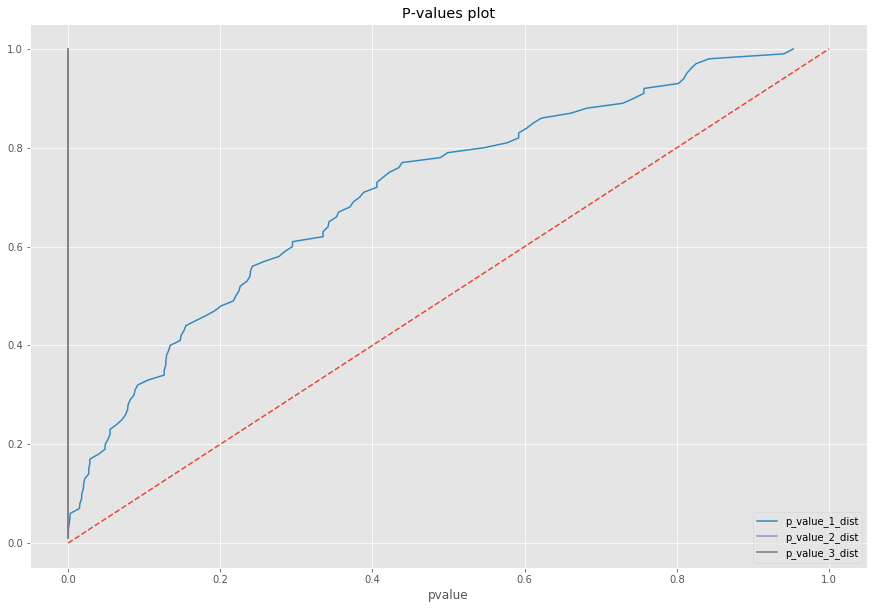

In [54]:
pvalue1, pvalue2, pvalue3 = [], [], []


for i in range(100):
    
    # 1 
    sample = distrib.rvs(size=1000)
    pvalue1.append(sts.chisquare(np.bincount(sample), coffee_expected)[1])
    
    #2
    sample = sts.randint.rvs(low=0, high=3, size=1000)
    pvalue2.append(sts.chisquare(np.bincount(sample), coffee_expected)[1])
    
    #3
    sample = sts.binom.rvs(2, p, size=1000)
    pvalue3.append(sts.chisquare(np.bincount(sample), coffee_expected)[1])

    
    
pvalue1.sort()
pvalue2.sort()
pvalue3.sort()

fig, ax = plt.subplots(figsize=(15, 10))
domain = np.linspace(0, 1, 2)

ax.plot(domain, domain, '--')
ax.plot(pvalue1, points, label='p_value_1_dist')
ax.plot(pvalue2, points, label='p_value_2_dist')
ax.plot(pvalue3, points, label='p_value_3_dist')

ax.legend()
ax.set_xlabel('pvalue')
ax.set_title('P-values plot')
plt.show()